### Importação de bibliotecas e carregamento do dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset netflix
df = pd.read_csv("netflix.csv")

# Informações que podem de alguma forma ser importantes na análise, 
# desde que não afetem o resultado final podem ser substituidas por um valor padrão.
# Neste caso: Diretor, Elenco, País, Data em que foi adicionado a plataforma, Avaliação e Duração

df['director'].fillna('Desconhecido', inplace=True)
df['country'].fillna('Desconhecido', inplace=True)
df['rating'].fillna('Não classificado', inplace=True)
df['duration'].fillna('Desconhecido', inplace=True)

# Em 'data_added' será adicionado NaT (Not a Time)  
# (Ideal para quando a ausência de uma data é uma informação válida e não deve ser substituída por uma data fictícia)
df['date_added'].fillna(pd.NaT, inplace=True)

# Traduzir nome das colunas para facilitar a leitura

df.rename(columns={
    'show_id': 'id_show',
    'type': 'tipo',
    'title': 'titulo',
    'director': 'diretor',
    'cast': 'elenco',
    'country': 'pais',
    'date_added': 'data_adicionada',
    'release_year': 'ano_lancamento',
    'rating': 'avaliacao',
    'duration': 'duracao',
    'listed_in': 'genero',
    'description': 'descricao'
}, inplace=True)



# Criar nova coluna `duracao_minutos` para armazenar a duração em minutos para filmes
df['duracao_minutos'] = np.where(df['duracao'].str.contains('min'), 
                                 df['duracao'].str.extract('(\d+)')[0].astype(float), 
                                 np.nan)

# Criar nova coluna `temporadas` para armazenar o número de temporadas para séries (Season ou Seasons)
df['temporadas'] = np.where(df['duracao'].str.contains(r'Season[s]?'), 
                            df['duracao'].str.extract('(\d+)')[0].astype(float), 
                            np.nan)

### Técnicas de Transformação e Normalização de Dados

Este notebook aborda diferentes técnicas de transformação e normalização de dados. O objetivo é preparar os dados para análise, garantindo que estejam em um formato adequado para a aplicação de algoritmos de machine learning e outras análises estatísticas. Serão exploradas técnicas como padronização, normalização, codificação de variáveis categóricas, e tratamento de valores ausentes.

#### Transformação Logarítmica

A transformação logarítmica é frequentemente aplicada a dados com uma grande amplitude de valores ou uma distribuição assimétrica. 
Ela ajuda a suavizar a distribuição, facilitando a análise e a visualização. Essa técnica é especialmente útil para dados positivos e contínuos.

Por exemplo, em um dataset de preços de imóveis, essa transformação ajuda a reduzir a influência dos valores mais altos, tornando a 
distribuição mais simétrica.

No dataset da Netflix, a coluna `duração_minutos` possui uma grande variação de valores e pode se beneficiar da transformação logarítmica 
para reduzir o impacto dos outliers e melhorar a análise dos dados.


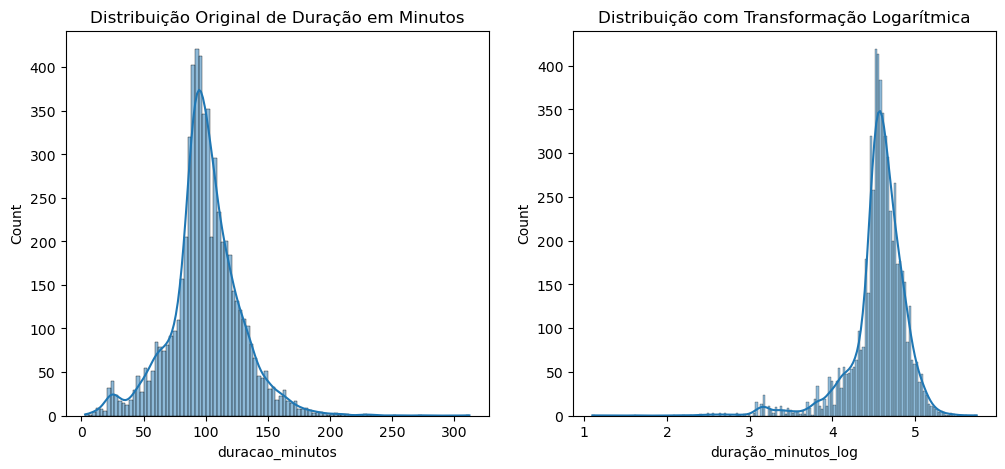

   duracao_minutos  duração_minutos_log
0             90.0             4.499810
1              NaN                  NaN
2              NaN                  NaN
3             91.0             4.510860
4            125.0             4.828314


In [ ]:
# Aplicar a transformação logarítmica na coluna 'duração_minutos'
df['duração_minutos_log'] = np.log(df['duracao_minutos'].replace(0, np.nan))  # Evita log de 0

# Comparar antes e depois
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Remover valores nulos para evitar erro na plotagem
sns.histplot(df['duracao_minutos'].dropna(), kde=True)
plt.title('Distribuição Original de Duração em Minutos')

plt.subplot(1, 2, 2)
sns.histplot(df['duração_minutos_log'].dropna(), kde=True)
plt.title('Distribuição com Transformação Logarítmica')

plt.show()

print(df[['duracao_minutos', 'duração_minutos_log']].head())

#### Transformação Raiz Quadrada

A transformação raiz quadrada é uma técnica que ajuda a reduzir a variação em dados com uma distribuição assimétrica, embora seu efeito seja menos intenso que o da transformação logarítmica. Ela é útil para dados com valores altos, mas funciona melhor em valores que são todos positivos ou que foram ajustados para evitar valores negativos. Essa transformação também ajuda a diminuir a dispersão, facilitando análises em distribuições enviesadas.

No caso do dataset da Netflix, vamos aplicar a transformação raiz quadrada à coluna duração_minutos. A coluna contém uma ampla faixa de valores, então a transformação pode ajudar a suavizar as diferenças e reduzir a influência de valores mais altos, melhorando a visualização.

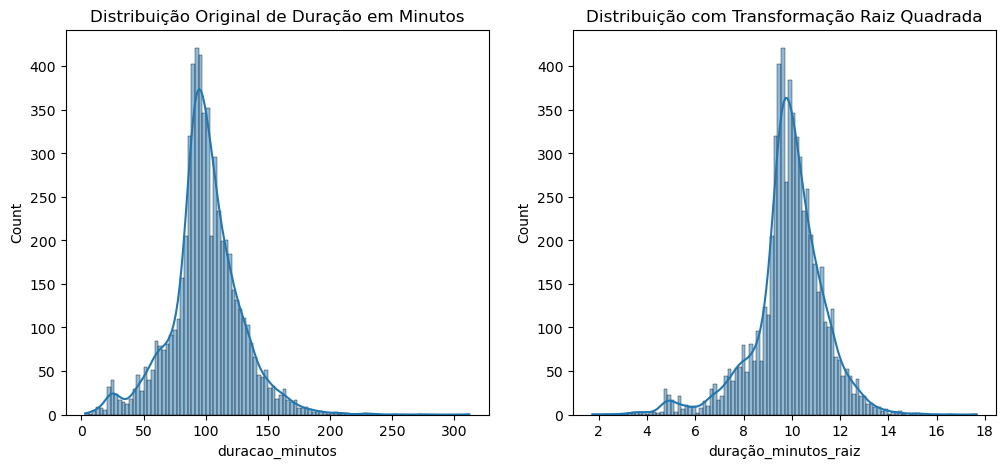

   duracao_minutos  duração_minutos_raiz
0             90.0              9.486833
1              NaN                   NaN
2              NaN                   NaN
3             91.0              9.539392
4            125.0             11.180340


In [ ]:
# Aplicar a transformação raiz quadrada na coluna 'duração_minutos'
df['duração_minutos_raiz'] = np.sqrt(df['duracao_minutos'])

# Comparar antes e depois
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Remover valores nulos para evitar erro na plotagem
sns.histplot(df['duracao_minutos'].dropna(), kde=True)
plt.title('Distribuição Original de Duração em Minutos')

plt.subplot(1, 2, 2)
sns.histplot(df['duração_minutos_raiz'].dropna(), kde=True)
plt.title('Distribuição com Transformação Raiz Quadrada')

plt.show()

# Exibir amostra dos dados
print(df[['duracao_minutos', 'duração_minutos_raiz']].head())

#### Transformação Box-Cox

A transformação Box-Cox é uma técnica poderosa para tornar distribuições não normais mais parecidas com uma distribuição normal (ou gaussiana), sendo especialmente útil em análises que assumem essa normalidade, como algumas estatísticas inferenciais e modelos de machine learning. Ela é particularmente eficaz em dados positivos e contínuos, e é uma generalização das transformações logarítmica e raiz quadrada, adaptando-se melhor a diferentes graus de dispersão.

No dataset Netflix, podemos aplicar a transformação Box-Cox à coluna duração_minutos para ver como ela afeta a distribuição dessa variável. Essa transformação tentará ajustar a distribuição da coluna para que seja o mais próxima possível de uma distribuição normal.

Note: you may need to restart the kernel to use updated packages.


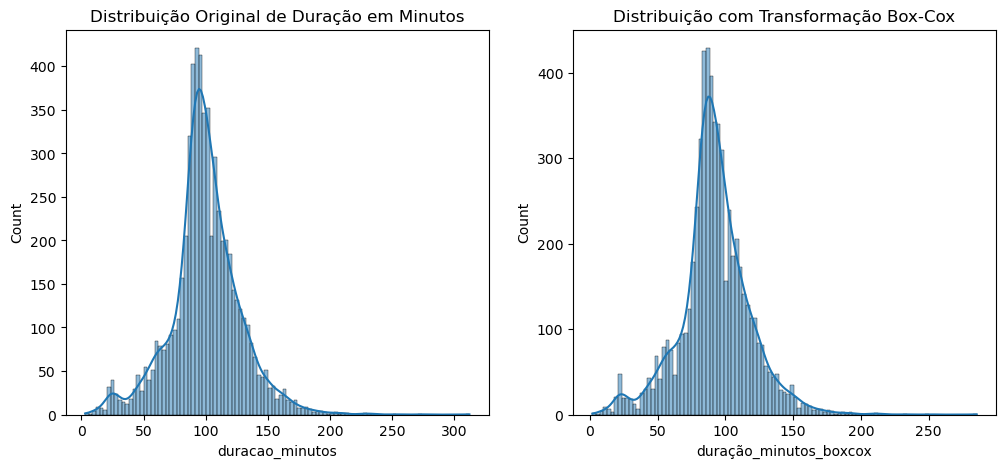

Lambda usado para transformação Box-Cox: 0.9818687940563376
   duracao_minutos  duração_minutos_boxcox
0             90.0               83.461996
1              NaN                     NaN
2              NaN                     NaN
3             91.0               84.383556
4            125.0              115.618724


In [23]:
%pip install scipy

from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Remover valores nulos para aplicar Box-Cox
df_boxcox = df['duracao_minutos'].dropna()

# Aplicar transformação Box-Cox
df_boxcox_transformed, lambda_boxcox = boxcox(df_boxcox)

# Criar uma nova coluna no dataframe original com os valores transformados
df['duração_minutos_boxcox'] = np.nan
df.loc[df_boxcox.index, 'duração_minutos_boxcox'] = df_boxcox_transformed

# Comparar antes e depois
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_boxcox, kde=True)
plt.title('Distribuição Original de Duração em Minutos')

plt.subplot(1, 2, 2)
sns.histplot(df['duração_minutos_boxcox'].dropna(), kde=True)
plt.title('Distribuição com Transformação Box-Cox')

plt.show()

# Exibir amostra dos dados
print("Lambda usado para transformação Box-Cox:", lambda_boxcox)
print(df[['duracao_minutos', 'duração_minutos_boxcox']].head())


### ----------------------------

In [24]:
# Importação para CSV

df.to_csv('netflix-cleaned.csv', index=False)